In [1]:
# 배치 정규화
# 라이브러리 불러오기
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 데이터 로드
iris = load_iris()
# 훈련용 데이터
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# print(df.info())
df = df.astype(float) # data 타입변경할 때
# label 데이터
df['label'] = iris.target # 붓꽃의 종류 (정답에 저장)
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [2]:
# enumerate 사용
dataList = ['this', 'is', 'deep learning', 'book']
b = list(enumerate(dataList))
c = dict(enumerate(dataList))
print(b)
print(c)

[(0, 'this'), (1, 'is'), (2, 'deep learning'), (3, 'book')]
{0: 'this', 1: 'is', 2: 'deep learning', 3: 'book'}


In [3]:
# 데이터 프레임에 데이터셋에대한 원-핫 인코딩(one-hot encoding)을 적용
label = pd.get_dummies(df['label'], prefix='label') # prefix는 컬럼 이름 앞에 접두사 처리
label
# 이전에 있던 df에 label을 추가
df = pd.concat([df, label], axis=1) # axis = 1은 열을 삭제, 0은 행을 삭제
# 이전에 있던 'label'을 삭제
df.drop('label', axis=1, inplace=True) # inplace는 df내에 값을 변경 적용
# df = df.drop(['label'], axis = 1) 이것과 위에 코드 둘 중 사용하면 된다.
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


In [6]:
# 훈련 데이터와 검증 데이터를 나누기...
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]  # 훈련 또는 테스트
# 배열로 변경
X = np.asarray(X)
# print("train_test data : \n ", X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]                             # 훈련 또는 테스트 레이블
# 배열로 변경
y = np.asarray(y)
# print("train_test label : \n ",y)


In [8]:
# 데이터 및 label을 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # test_size=0.2(약 20%는 검증용)

In [10]:
len(X_train)
len(y_train)
len(X_test)
len(y_test)

30

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Input

model = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]);
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,763 (147.51 KB)

 Trainable params: 37,763 (147.51 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, 
    y_train,
    epochs = 1000,
    validation_split = 0.25,
    batch_size = 40,
    verbose = 2
)

Epoch 1/1000
3/3 - 2s - 658ms/step - accuracy: 0.4667 - loss: 1.0670 - val_accuracy: 0.6333 - val_loss: 0.9367
Epoch 2/1000
3/3 - 0s - 27ms/step - accuracy: 0.6222 - loss: 0.9159 - val_accuracy: 0.6333 - val_loss: 0.8382
Epoch 3/1000
3/3 - 0s - 27ms/step - accuracy: 0.6222 - loss: 0.8147 - val_accuracy: 0.6333 - val_loss: 0.7426
Epoch 4/1000
3/3 - 0s - 27ms/step - accuracy: 0.6222 - loss: 0.7069 - val_accuracy: 0.6667 - val_loss: 0.6568
Epoch 5/1000
3/3 - 0s - 26ms/step - accuracy: 0.6778 - loss: 0.6057 - val_accuracy: 0.9667 - val_loss: 0.6020
Epoch 6/1000
3/3 - 0s - 26ms/step - accuracy: 0.9444 - loss: 0.5177 - val_accuracy: 0.9667 - val_loss: 0.5333
Epoch 7/1000
3/3 - 0s - 26ms/step - accuracy: 0.9222 - loss: 0.4461 - val_accuracy: 0.9667 - val_loss: 0.4526
Epoch 8/1000
3/3 - 0s - 24ms/step - accuracy: 0.9778 - loss: 0.3911 - val_accuracy: 0.9667 - val_loss: 0.3871
Epoch 9/1000
3/3 - 0s - 28ms/step - accuracy: 0.9556 - loss: 0.3381 - val_accuracy: 0.8667 - val_loss: 0.3859
Epoch 10/

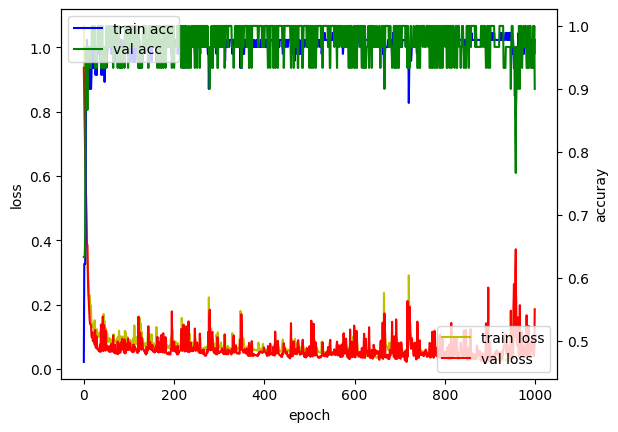

In [13]:
# 모델에 대한 훈련 결과를 그래프로 표현
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper left')
plt.show()

In [14]:
# 정확도와 손실 정보를 표현
loss_and_metrics = model.evaluate(X_test, y_test)
print("#손실과 정확도 평가#")
print(loss_and_metrics)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8667 - loss: 0.1659
#손실과 정확도 평가#
[0.16593773663043976, 0.8666666746139526]


In [15]:
# 배치 정규화가 적용된 모델 생성
from tensorflow.keras.initializers import RandomNormal, Constant
model2 = Sequential([
    Input(shape=(4,)),
    Dense(64, activation='relu'),
    BatchNormalization(),         # 배치 정규화  

    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,435 (165.76 KB)

 Trainable params: 42,179 (164.76 KB)

 Non-trainable params: 256 (1.00 KB)

In [16]:
model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/1000
3/3 - 2s - 747ms/step - accuracy: 0.6667 - loss: 0.7691 - val_accuracy: 0.4333 - val_loss: 1.0086
Epoch 2/1000
3/3 - 0s - 27ms/step - accuracy: 0.9222 - loss: 0.2797 - val_accuracy: 0.4333 - val_loss: 0.9929
Epoch 3/1000
3/3 - 0s - 26ms/step - accuracy: 0.9556 - loss: 0.1983 - val_accuracy: 0.4333 - val_loss: 0.9722
Epoch 4/1000
3/3 - 0s - 26ms/step - accuracy: 0.9444 - loss: 0.1488 - val_accuracy: 0.4333 - val_loss: 0.9503
Epoch 5/1000
3/3 - 0s - 26ms/step - accuracy: 0.9222 - loss: 0.1924 - val_accuracy: 0.4667 - val_loss: 0.9343
Epoch 6/1000
3/3 - 0s - 26ms/step - accuracy: 0.9556 - loss: 0.1198 - val_accuracy: 0.5667 - val_loss: 0.9309
Epoch 7/1000
3/3 - 0s - 26ms/step - accuracy: 0.9556 - loss: 0.1092 - val_accuracy: 0.6000 - val_loss: 0.9152
Epoch 8/1000
3/3 - 0s - 26ms/step - accuracy: 0.9778 - loss: 0.0834 - val_accuracy: 0.5667 - val_loss: 0.8887
Epoch 9/1000
3/3 - 0s - 26ms/step - accuracy: 0.9778 - loss: 0.0649 - val_accuracy: 0.5000 - val_loss: 0.8525
Epoch 10/

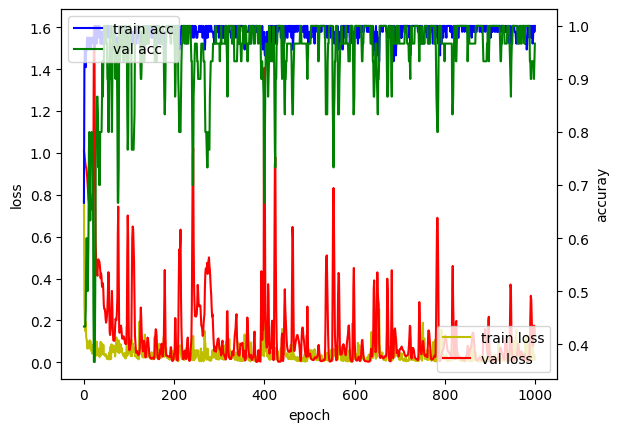

In [17]:
# 모델에 대한 훈련 결과를 그래프로 표현
%matplotlib inline
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper left')
plt.show()

In [18]:
# 정확도와 손실 정보를 표현
loss_and_metrics = model2.evaluate(X_test, y_test)
print("#손실과 정확도 평가#")
print(loss_and_metrics)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8667 - loss: 0.4233
#손실과 정확도 평가#
[0.4232647716999054, 0.8666666746139526]


In [2]:
%pip install tensorflow_datasets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# 필요 라이브러리 설치
%pip install tensorflow-datasets
%pip install ipywidgets
%pip install tfds-nightly==4.9.3.dev202311210044

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/5.0 MB ? eta -:--:--
   ---------------------------------------- 5.0/5.0 MB 30.7 MB/s eta 0:00:00
  Attempting uninstall: tfds-nightly
    Found existing installation: tfds-nightly 4.9.7.dev202502030044
    Uninstalling tfds-nightly-4.9.7.dev202502030044:
      Successfully uninstalled tfds-nightly-4.9.7.dev202502030044
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [4]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split=(tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True, as_supervised=True)

padded_shapes =([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Admin\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete29B7MO\imdb_reviews-train…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Admin\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete29B7MO\imdb_reviews-test.…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Admin\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0.incomplete29B7MO\imdb_reviews-unsup…

Dataset imdb_reviews downloaded and prepared to C:\Users\Admin\tensorflow_datasets\imdb_reviews\subwords8k\1.0.0. Subsequent calls will reuse this data.


In [5]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()   # train_batch 내에 있는 데이터를 배열로 보여줌.
train_labels.numpy()

array([[4344,    2,   37, ..., 1976, 1323, 7975],
       [  62, 1760,    9, ...,    0,    0,    0],
       [   6,  218,   14, ...,    0,    0,    0],
       ...,
       [  62,    9,    1, ...,    0,    0,    0],
       [1284,  536,  390, ...,    0,    0,    0],
       [6311, 3265, 8050, ...,    0,    0,    0]])

In [6]:
# padded_batch()메서드 - 배치에서 가장 긴 문자열의 길이를 기준으로 시퀸스를 0으로 채움
# 예제)
import tensorflow as tf
dataset = tf.data.Dataset.range(111) # 0 ~ 110 까지의 숫자로 된 데이터 셋 
dataset = dataset.map(lambda x : tf.fill([tf.cast(x, tf.int32)], x)) # tf.fill()는 값을 채우는 메서드...
dataset = dataset.padded_batch(2, padded_shapes=(None,))

for batch in dataset.take(3):   # dataset.take() 메서드는 dataset의 일부 데이터를 읽어옴
  print(batch.numpy())

[[0]
 [1]]
[[2 2 0]
 [3 3 3]]
[[4 4 4 4 0]
 [5 5 5 5 5]]


In [ ]:
tf.cast(10, tf.int32)   # 타입 변환 
tf.fill(tf.cast(5, tf.int32),5)

In [10]:
# 드롭아웃이 적용되지 않은 모델 구현

# info는 메타 정보 encoder 정보를 추출
encoder = info.features['text'].encoder
# 모델 생성
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),  # 임베딩층은 단어 하나당 하나의 벡터로 저장 
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.summary()    

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 모델 컴파일 및 훈련

model1.compile(
    optimizer = tf.keras.optimizers.Adam(1e-4),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)
history1 = model1.fit(train_batches, epochs=5, validation_data = test_batches, validation_steps=30)

Epoch 1/5
1127/2500 ━━━━━━━━━━━━━━━━━━━━ 3:13 141ms/step - accuracy: 0.5075 - loss: 0.6931

KeyboardInterrupt: 

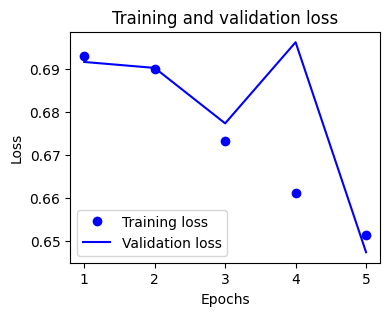

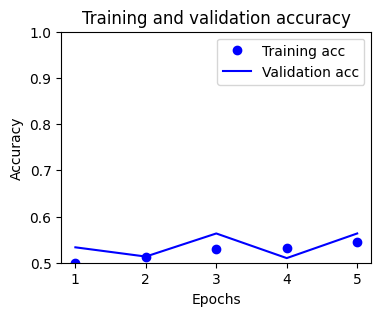

In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history1.history          # 훈련시 출력 정보를 history_dict로 저장
acc = history_dict['accuracy']           # accuracy 정보(훈련 정확도)를 acc에 저장
val_acc = history_dict['val_accuracy']   # val_accuracy(검증 정확도) 정보를 val_acc에 저장
loss = history_dict['loss']              # loss(훈련 loss) 정보를 loss에 저장
val_loss = history_dict['val_loss']      # val_loss(검증 loss) 정보를 val_loss에 저장
epochs = range(1, len(acc)+1)            # epochs 값을 [1~5] 값을 가지게 함
plt.figure(figsize=(4,3))                # figure는 그래프 크기를 지칭하는 것으로, 가로4인치, 세로3인치로 지정
plt.plot(epochs, loss, 'bo', label='Training loss')         # Training loss라는 이름으로 epochs별, loss를 'bo(점)' 형식으로
plt.plot(epochs, val_loss, 'b', label='Validation loss')    # Validation loss 라는 이름으로 epochs별로, val_loss를 'b(선)'
plt.title('Training and validation loss')       # 그래프 타이틀
plt.xlabel('Epochs')        # x축은 epochs 값
plt.ylabel('Loss')          # y축은 loss 값
plt.legend()                # 범례표시, 위치 값이 없으면 자동으로 위치를 가져감
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.ylim((0.5,1))
plt.show()

In [14]:
# 모델 생성
model1 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),  # 임베딩층은 단어 하나당 하나의 벡터로 저장 
    # tf.keras.layers.LSTM(64),   # Bidrectioal()레이어로 변경...
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [15]:
# 모델 컴파일 및 훈련

model1.compile(
    optimizer = tf.keras.optimizers.Adam(1e-4),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)
history1 = model1.fit(train_batches, epochs=5, validation_data = test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 429s 171ms/step - accuracy: 0.6211 - loss: 0.6151 - val_accuracy: 0.8600 - val_loss: 0.3369
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 406s 162ms/step - accuracy: 0.8692 - loss: 0.3348 - val_accuracy: 0.8567 - val_loss: 0.3991
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 409s 164ms/step - accuracy: 0.9058 - loss: 0.2505 - val_accuracy: 0.8467 - val_loss: 0.4044
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 408s 163ms/step - accuracy: 0.9233 - loss: 0.2156 - val_accuracy: 0.8800 - val_loss: 0.3039
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 403s 161ms/step - accuracy: 0.9308 - loss: 0.1975 - val_accuracy: 0.8533 - val_loss: 0.4890


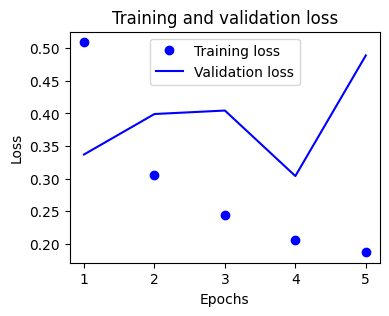

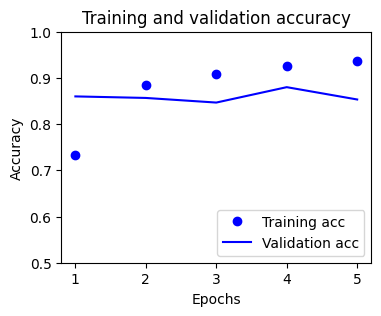

In [17]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history1.history          # 훈련시 출력 정보를 history_dict로 저장
acc = history_dict['accuracy']           # accuracy 정보(훈련 정확도)를 acc에 저장
val_acc = history_dict['val_accuracy']   # val_accuracy(검증 정확도) 정보를 val_acc에 저장
loss = history_dict['loss']              # loss(훈련 loss) 정보를 loss에 저장
val_loss = history_dict['val_loss']      # val_loss(검증 loss) 정보를 val_loss에 저장
epochs = range(1, len(acc)+1)            # epochs 값을 [1~5] 값을 가지게 함
plt.figure(figsize=(4,3))                # figure는 그래프 크기를 지칭하는 것으로, 가로4인치, 세로3인치로 지정
plt.plot(epochs, loss, 'bo', label='Training loss')         # Training loss라는 이름으로 epochs별, loss를 'bo(점)' 형식으로
plt.plot(epochs, val_loss, 'b', label='Validation loss')    # Validation loss 라는 이름으로 epochs별로, val_loss를 'b(선)'
plt.title('Training and validation loss')       # 그래프 타이틀
plt.xlabel('Epochs')        # x축은 epochs 값
plt.ylabel('Loss')          # y축은 loss 값
plt.legend()                # 범례표시, 위치 값이 없으면 자동으로 위치를 가져감
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [18]:
# 모델 생성
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),  # 임베딩층은 단어 하나당 하나의 벡터로 저장 
    # tf.keras.layers.LSTM(64),   # Bidrectioal()레이어로 변경...
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, None, 64)       │       523,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,794,629 (6.85 MB)

 Trainable params: 598,209 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,196,420 (4.56 MB)

In [19]:
# 모델 컴파일 및 훈련

model2.compile(
    optimizer = tf.keras.optimizers.Adam(1e-4),
    loss = 'binary_crossentropy',
    metrics=['accuracy']
)
history2 = model1.fit(train_batches, epochs=5, validation_data = test_batches, validation_steps=30)

Epoch 1/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 402s 161ms/step - accuracy: 0.9422 - loss: 0.1677 - val_accuracy: 0.8967 - val_loss: 0.3059
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 409s 164ms/step - accuracy: 0.9445 - loss: 0.1632 - val_accuracy: 0.8400 - val_loss: 0.5124
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 400s 160ms/step - accuracy: 0.9542 - loss: 0.1367 - val_accuracy: 0.8400 - val_loss: 0.4962
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 406s 162ms/step - accuracy: 0.9637 - loss: 0.1164 - val_accuracy: 0.8567 - val_loss: 0.5917
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 409s 163ms/step - accuracy: 0.9647 - loss: 0.1106 - val_accuracy: 0.8667 - val_loss: 0.5146


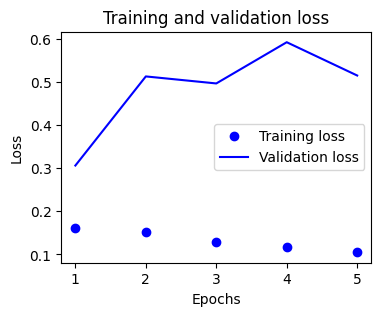

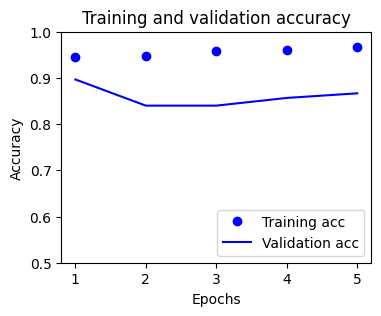

In [20]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history2.history          # 훈련시 출력 정보를 history_dict로 저장
acc = history_dict['accuracy']           # accuracy 정보(훈련 정확도)를 acc에 저장
val_acc = history_dict['val_accuracy']   # val_accuracy(검증 정확도) 정보를 val_acc에 저장
loss = history_dict['loss']              # loss(훈련 loss) 정보를 loss에 저장
val_loss = history_dict['val_loss']      # val_loss(검증 loss) 정보를 val_loss에 저장
epochs = range(1, len(acc)+1)            # epochs 값을 [1~5] 값을 가지게 함
plt.figure(figsize=(4,3))                # figure는 그래프 크기를 지칭하는 것으로, 가로4인치, 세로3인치로 지정
plt.plot(epochs, loss, 'bo', label='Training loss')         # Training loss라는 이름으로 epochs별, loss를 'bo(점)' 형식으로
plt.plot(epochs, val_loss, 'b', label='Validation loss')    # Validation loss 라는 이름으로 epochs별로, val_loss를 'b(선)'
plt.title('Training and validation loss')       # 그래프 타이틀
plt.xlabel('Epochs')        # x축은 epochs 값
plt.ylabel('Loss')          # y축은 loss 값
plt.legend()                # 범례표시, 위치 값이 없으면 자동으로 위치를 가져감
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()

In [1]:
## 조기 종료
# 조기 종료는 훈련의 중단 시기를 결정할 뿐, 훈련 모델의 최고 성능을 보장하지 않아요.

# 필요한 라이브러리 호출
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb

import tensorflow as tf
import numpy as np


In [2]:
max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernal_size = 3
hiddens_dims = 250
epochs = 300
np.random.seed(7)

In [3]:
# 데이터 처리(훈련데이터와 검증데이터 생성)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [26]:
x_train.shape

(25000, 400)

In [6]:
# 조기종료를 위한 콜백 함수
import os
checkpoint_path = "training_1/cp.keras" # 파일의 확장자는 '.keras'이여야 함
checkpoint_dir = os.path.dirname(checkpoint_path)
print(checkpoint_path)
print(checkpoint_dir)


# 콜백 함수
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1,
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True
)

training_1/cp.keras
training_1


In [8]:
# 조기 종료를 적용하지 않은 모델

model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters, kernal_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hiddens_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

d:\tensorflow\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/300
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6727 - loss: 0.5577
Epoch 1: val_accuracy improved from -inf to 0.87300, saving model to training_1/cp.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.6732 - loss: 0.5571 - val_accuracy: 0.8730 - val_loss: 0.3031
Epoch 2/300
624/625 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8997 - loss: 0.2491
Epoch 2: val_accuracy improved from 0.87300 to 0.89300, saving model to training_1/cp.keras
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.8997 - loss: 0.2491 - val_accuracy: 0.8930 - val_loss: 0.2580
Epoch 3/300
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9451 - loss: 0.1547
Epoch 3: val_accuracy did not improve from 0.89300
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.9451 - loss: 0.1547 - val_accuracy: 0.8912 - val_loss: 0.2778
Epoch 4/300
623/625 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9669 - loss: 0.1022
Epoch 4: val_accuracy did not improve from 0.89300
625/625 